In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils.metrics import Results


### Funções auxiliares

In [13]:
def load_metrics(model_name):
    with open(f'metrics/{model_name}_metrics.npy', 'rb') as f:
        acc = np.load(f, allow_pickle=True)
        f1 = np.load(f, allow_pickle=True)
        cm = np.load(f, allow_pickle=True)
        roc = np.load(f, allow_pickle=True)
        # grid_results = np.load(f, allow_pickle=True)
    return acc, f1, cm, roc #, grid_results

In [14]:
def plot_box(df, metric):
    fig, ax = plt.subplots()
    ax.boxplot(df.values)
    ax.set_xticklabels(df.columns)
    ax.set_title(f'Boxplot {metric} (10-Fold CV)')
    ax.set_xlabel('Modelos')
    ax.set_ylabel(metric)
    plt.show()

# Análise dos Modelos

Carregando as métricas

In [15]:
# dt_acc, dt_f1, dt_cm, dt_roc, dt_grid_results = load_metrics('DecisionTreeClassifier')
# gnb_acc, gnb_f1, gnb_cm, gnb_roc, gnb_grid_results = load_metrics('GaussianNB')
# mnnb_acc, mnnb_f1, mnnb_cm, mnnb_roc, mnnb_grid_results = load_metrics('MultinomialNB')
# # mlp_acc, mlp_f1, mlp_cm, mlp_roc, mlp_grid_results = load_metrics('MLP')
# knn_acc, knn_f1, knn_cm, knn_roc, knn_grid_results = load_metrics('KNeighborsClassifier')
# svc_acc, svc_f1, svc_cm, svc_roc, svc_grid_results = load_metrics('SVC')

In [16]:
dt_acc, dt_f1, dt_cm, dt_roc = load_metrics('DecisionTreeClassifier')
gnb_acc, gnb_f1, gnb_cm, gnb_roc = load_metrics('GaussianNB')
mnnb_acc, mnnb_f1, mnnb_cm, mnnb_roc = load_metrics('MultinomialNB')
mlp_acc, mlp_f1, mlp_cm, mlp_roc = load_metrics('MLP')
knn_acc, knn_f1, knn_cm, knn_roc = load_metrics('KNeighborsClassifier')
svc_acc, svc_f1, svc_cm, svc_roc = load_metrics('SVC')

### DataFrames

In [17]:
acc_df = pd.DataFrame(
    data={
        'DT': dt_acc,
        'GNB': gnb_acc,
        'MnNB': mnnb_acc,
        'MLP': mlp_acc,
        'KNN': knn_acc,
        'SVC': svc_acc,
    }
)
fscore_df = pd.DataFrame(
    data={
        'DT': dt_f1,
        'GNB': gnb_f1,
        'MnNB': mnnb_f1,
        'MLP': mlp_f1,
        'KNN': knn_f1,
        'SVC': svc_f1,
    }
)

### Plots

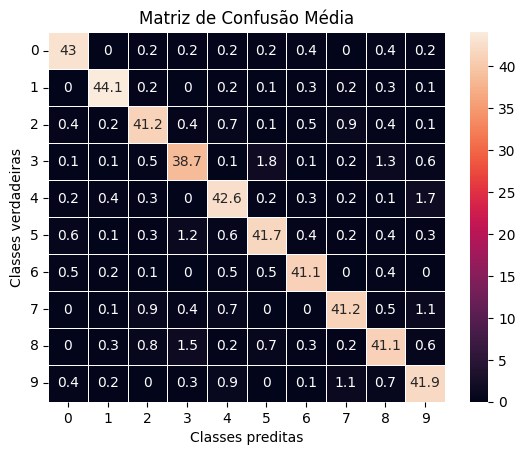

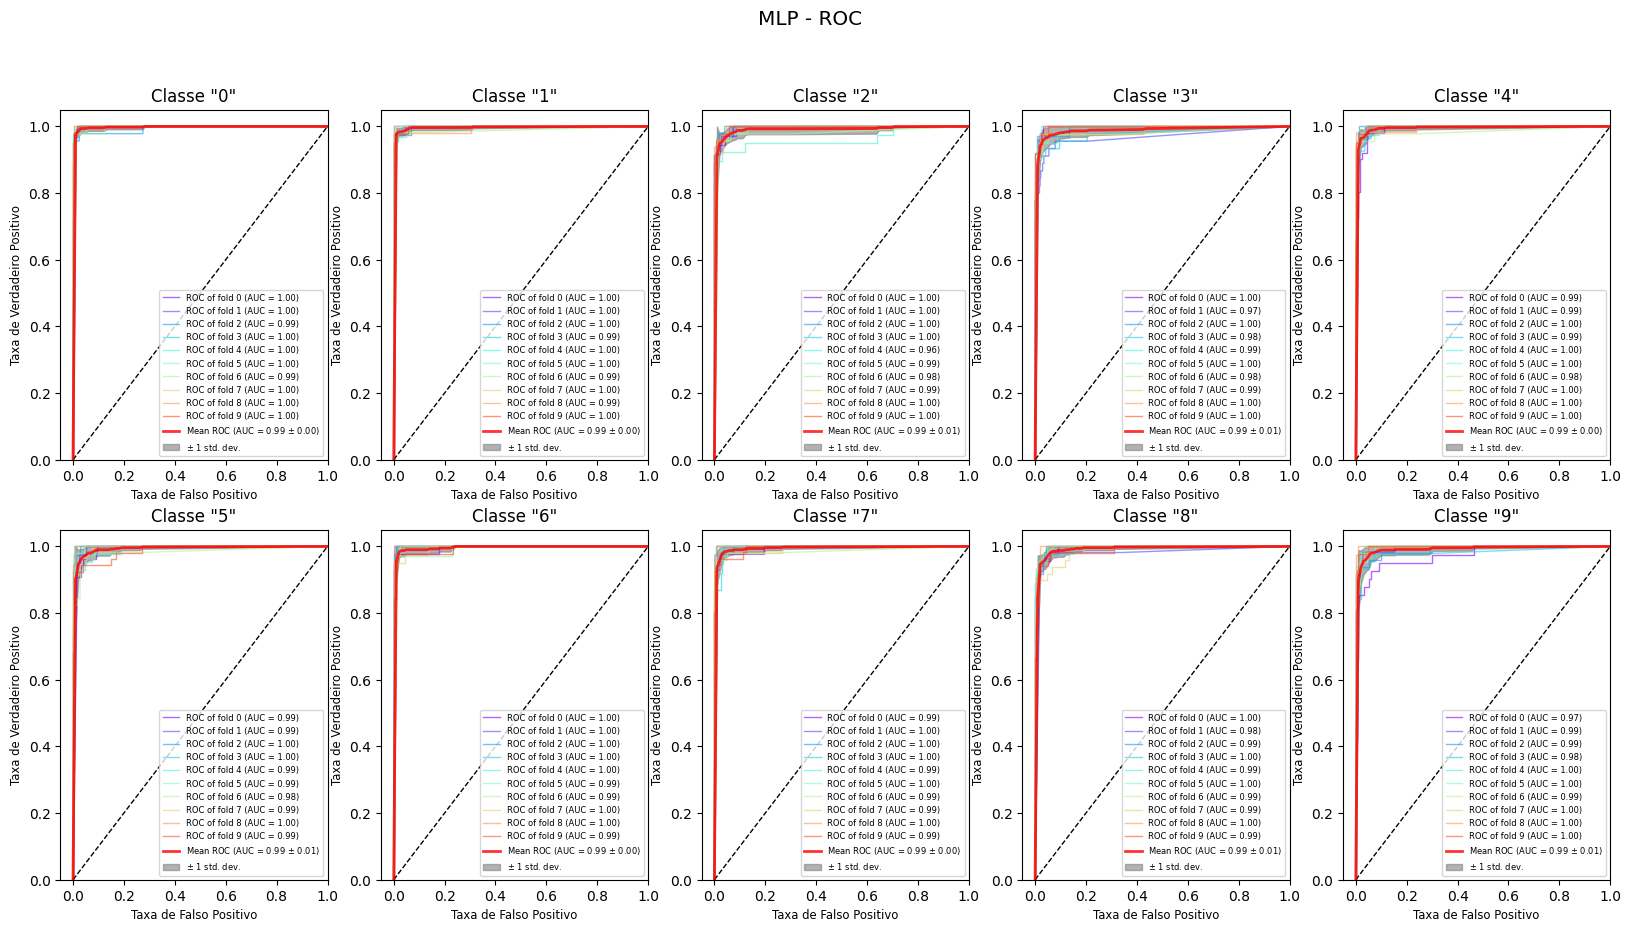

In [19]:
mlp_results = Results('MLP', mlp_acc, mlp_f1, mlp_cm, mlp_roc, '')
mlp_results.plot()

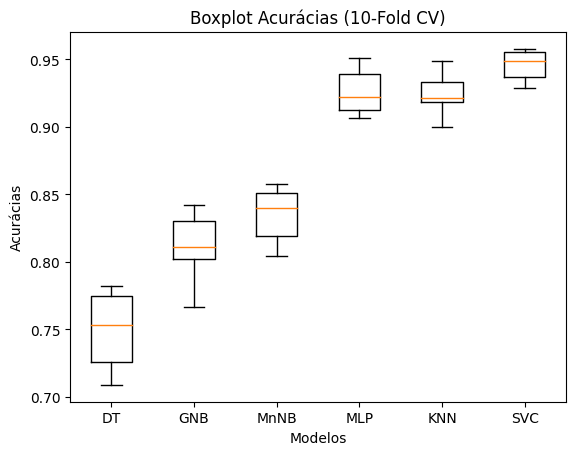

In [20]:
# Acurácias
plot_box(acc_df, 'Acurácias')

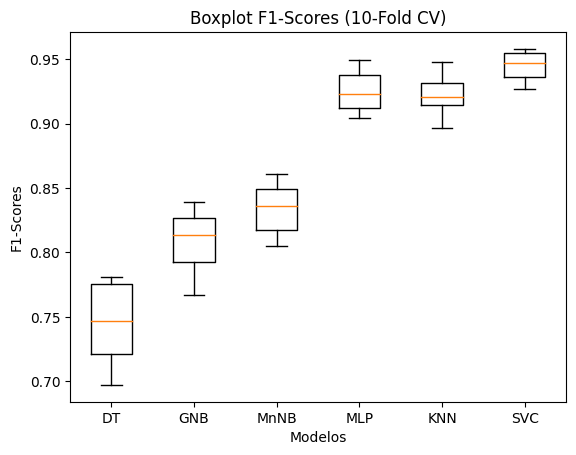

In [21]:
# F1-Scores
plot_box(fscore_df, 'F1-Scores')